## Spectral graph analysis - EPF

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from argparse import Namespace
from functools import reduce

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def fft(yt):
    n = len(yt) # length of the signal
    k = np.arange(n)
    T = n/2
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    # -------------
    FFTYT = np.fft.fft(yt)/n # fft computing and normalization
    FFTYT = FFTYT[range(n//2)]
    fftyt = abs(FFTYT)
    return frq, fftyt
    

# Synthetic data

## FEDFormer

In [3]:
pred_init = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_3.npy')
pred_4 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_4.npy')
pred_5 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_5.npy')
pred_6 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_6.npy')
pred_7 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_7.npy')
pred_8 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_8.npy')
pred_9 = np.load('/pred_files/synthetic_data/eq/FEDFormer/pred_9.npy')
actual = np.load('/pred_files/synthetic_data/eq/FEDFormer/true.npy')

### Visualization per epoch

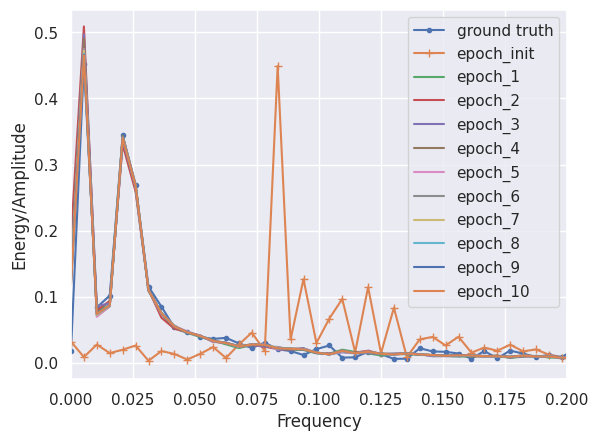

In [4]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,0]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,0]
freq5,energy5 = fft(ts5)

ts6 = pred_6[idx,:,0]
freq6,energy6 = fft(ts6)

ts7 = pred_7[idx,:,0]
freq7,energy7 = fft(ts7)

ts8 = pred_8[idx,:,0]
freq8,energy8 = fft(ts8)

ts9 = pred_9[idx,:,0]
freq9,energy9 = fft(ts9)

ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)
plt.plot(freq6,energy6)
plt.plot(freq7,energy7)

plt.plot(freq8,energy8)
plt.plot(freq9,energy9)


plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/eq/FEDFormer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

## spectrum visualization: init, first, last

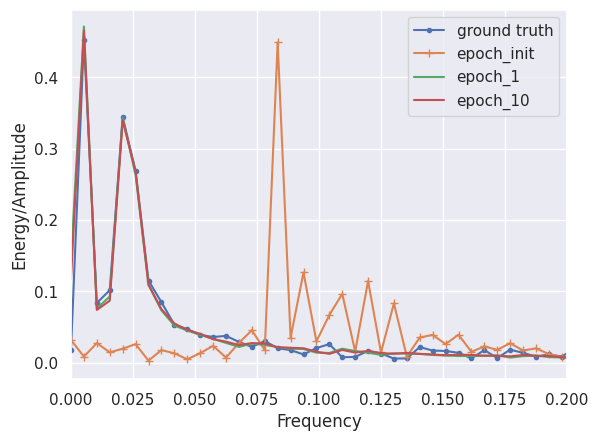

In [5]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_10'])

plt.xlim([0,0.2])

plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/eq/FEDFormer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [6]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))
e7 = np.zeros((192,))
e8 = np.zeros((192,))
e9 = np.zeros((192,))


for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,0]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,0]
  freq5,energy5 = fft(ts5)

  ts6 = pred_6[idx,:,0]
  freq6,energy6 = fft(ts6)

  ts7 = pred_7[idx,:,0]
  freq7,energy7 = fft(ts7)

  ts8 = pred_8[idx,:,0]
  freq8,energy8 = fft(ts8)

  ts9 = pred_9[idx,:,0]
  freq9,energy9 = fft(ts9)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5
  e6 += energy6
  e7 += energy7
  e8 += energy8
  e9 += energy9

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496
energy6 = e6 / 2496
energy7 = e7 / 2496
energy8 = e8 / 2496
energy9 = e9 / 2496

In [7]:
fed_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init,'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8, 'pred9_energy':energy9}

df_fed =  pd.DataFrame(fed_dict)
df_fed

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
0,0.000000,0.065664,0.203290,0.122776,0.120466,0.117775,0.115792,0.112065,0.112292,0.110791,0.110262,0.110399,0.110181
1,0.005208,0.479458,0.010932,0.410791,0.408268,0.424393,0.436964,0.434723,0.435949,0.436112,0.434219,0.434071,0.433770
2,0.010417,0.081815,0.019287,0.076932,0.075138,0.077672,0.078480,0.077753,0.077921,0.078186,0.078503,0.078340,0.078323
3,0.015625,0.108895,0.011624,0.105081,0.105166,0.107327,0.107960,0.107648,0.107787,0.107819,0.107714,0.107760,0.107777
4,0.020833,0.363325,0.015898,0.360905,0.359631,0.362281,0.362343,0.362176,0.362267,0.362193,0.362421,0.362554,0.362613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.973958,0.012816,0.002134,0.001624,0.001662,0.001694,0.001764,0.001774,0.001726,0.001742,0.001741,0.001748,0.001751
188,0.979167,0.010976,0.002215,0.001723,0.001739,0.001652,0.001729,0.001727,0.001681,0.001698,0.001698,0.001700,0.001703
189,0.984375,0.007487,0.002516,0.001829,0.001704,0.001765,0.001807,0.001805,0.001747,0.001761,0.001759,0.001764,0.001767
190,0.989583,0.010105,0.002518,0.001718,0.001725,0.001666,0.001729,0.001744,0.001702,0.001720,0.001723,0.001725,0.001729


In [8]:
x = df_fed.iloc[1:2, :]
y = df_fed.iloc[4:5, :]
sub_df_fed = pd.concat([x, y])
sub_df_fed

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
1,0.005208,0.479458,0.010932,0.410791,0.408268,0.424393,0.436964,0.434723,0.435949,0.436112,0.434219,0.434071,0.433770
4,0.020833,0.363325,0.015898,0.360905,0.359631,0.362281,0.362343,0.362176,0.362267,0.362193,0.362421,0.362554,0.362613


In [9]:
def fed_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(10)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [10]:
fed_ratios = fed_ratio(sub_df_fed)
fed_ratios = fed_ratios.drop('frequency', axis=1)
fed_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio,epoch_6_ratio,epoch_7_ratio,epoch_8_ratio,epoch_9_ratio
1,0.022800,0.856782,0.851520,0.885151,0.911371,0.906697,0.909253,0.909594,0.905646,0.905337,0.904708
4,0.043756,0.993339,0.989831,0.997125,0.997297,0.996837,0.997087,0.996883,0.997512,0.997876,0.998040


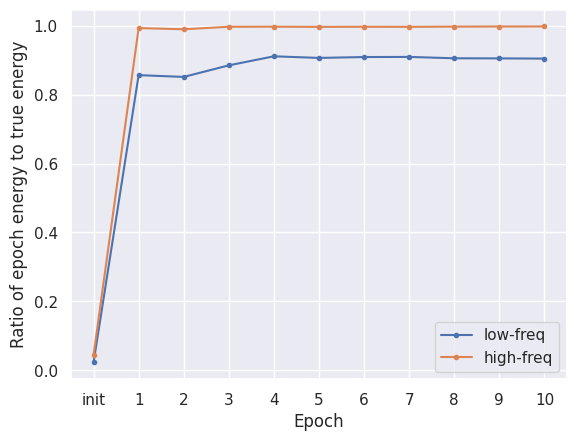

In [11]:
low = fed_ratios.iloc[0, :]
high = fed_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(fed_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/eq/FEDFormer/spectral_graphs/spectrum_ratio.png')
plt.show()

## AutoFormer

In [12]:
pred_init = np.load('/pred_files/synthetic_data/eq/Autoformer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/eq/Autoformer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/eq/Autoformer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/eq/Autoformer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/eq/Autoformer/pred_3.npy')
pred_4 = np.load('/pred_files/synthetic_data/eq/Autoformer/pred_4.npy')
pred_5 = np.load('/pred_files/synthetic_data/eq/Autoformer/pred_5.npy')
pred_6 = np.load('/pred_files/synthetic_data/eq/Autoformer/pred_6.npy')
actual = np.load('/pred_files/synthetic_data/eq/Autoformer/true.npy')

### Visualization per epoch

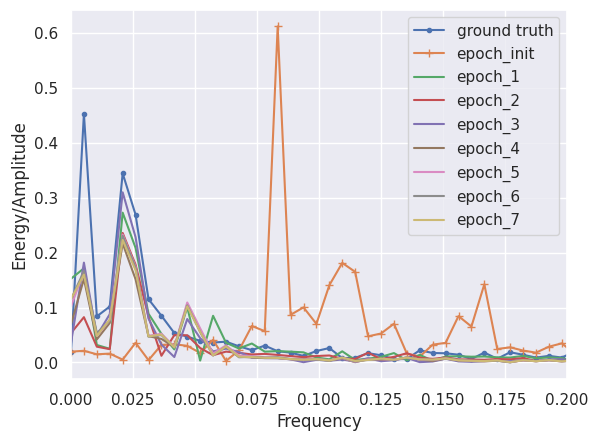

In [13]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,0]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,0]
freq5,energy5 = fft(ts5)

ts6 = pred_6[idx,:,0]
freq6,energy6 = fft(ts6)

ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)
plt.plot(freq6,energy6)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/eq/Autoformer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

### spectrum visualization: init, first, last

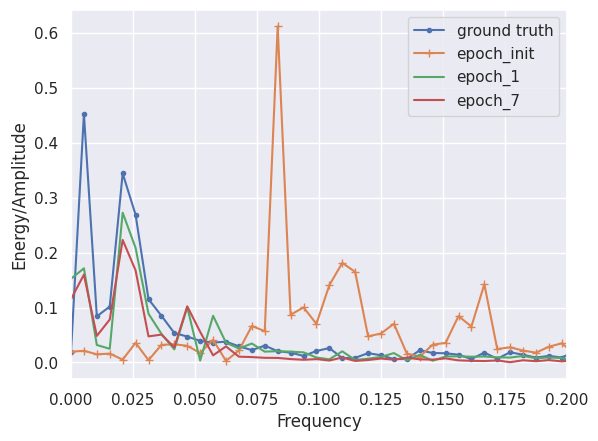

In [14]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq6,energy6)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_7'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/eq/Autoformer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [15]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))

for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,0]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,0]
  freq5,energy5 = fft(ts5)

  ts6 = pred_6[idx,:,0]
  freq6,energy6 = fft(ts6)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5
  e6 += energy6

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496
energy6 = e6 / 2496

In [16]:
auto_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6}#, 'pred7_energy':energy7, 'pred8_energy':energy8}

df_auto =  pd.DataFrame(auto_dict)
df_auto

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy
0,0.000000,0.065664,0.204885,0.221282,0.212423,0.215797,0.214207,0.213863,0.213847,0.211945
1,0.005208,0.479458,0.020319,0.128614,0.108763,0.107338,0.111060,0.117267,0.118156,0.116348
2,0.010417,0.081815,0.018467,0.100905,0.082352,0.085252,0.077616,0.084786,0.080639,0.081211
3,0.015625,0.108895,0.016353,0.085047,0.087309,0.080231,0.074204,0.080999,0.077511,0.076729
4,0.020833,0.363325,0.016526,0.187444,0.200023,0.239198,0.191363,0.210429,0.198611,0.191015
...,...,...,...,...,...,...,...,...,...,...
187,0.973958,0.012816,0.007480,0.003377,0.001744,0.001851,0.001903,0.002004,0.001971,0.001863
188,0.979167,0.010976,0.007332,0.003456,0.001730,0.001858,0.001918,0.002010,0.001957,0.001871
189,0.984375,0.007487,0.007083,0.003327,0.001704,0.001871,0.001845,0.001946,0.001893,0.001825
190,0.989583,0.010105,0.007525,0.003276,0.001736,0.001934,0.001886,0.001992,0.001916,0.001831


In [17]:
x = df_auto.iloc[1:2, :]
y = df_auto.iloc[4:5, :]
sub_df_auto = pd.concat([x, y])
sub_df_auto

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy
1,0.005208,0.479458,0.020319,0.128614,0.108763,0.107338,0.111060,0.117267,0.118156,0.116348
4,0.020833,0.363325,0.016526,0.187444,0.200023,0.239198,0.191363,0.210429,0.198611,0.191015


In [18]:
def auto_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(7)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [19]:
auto_ratios = auto_ratio(sub_df_auto)
auto_ratios = auto_ratios.drop('frequency', axis=1)
auto_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio,epoch_6_ratio
1,0.042378,0.268248,0.226845,0.223874,0.231636,0.244583,0.246437,0.242666
4,0.045484,0.515912,0.550534,0.658358,0.526700,0.579176,0.546649,0.525742


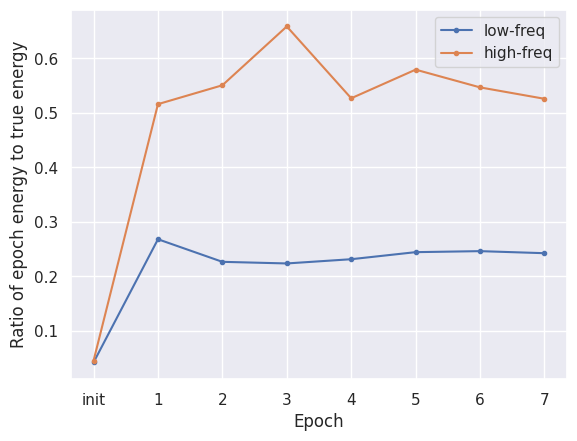

In [20]:
low = auto_ratios.iloc[0, :]
high = auto_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(auto_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5', '6', '7'])#, '8', '9'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/eq/Autoformer/spectral_graphs/spectrum_ratio.png')
plt.show()

### InFormer

In [21]:
pred_init = np.load('/pred_files/synthetic_data/eq/Informer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/eq/Informer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/eq/Informer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/eq/Informer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/eq/Informer/pred_3.npy')
pred_4 = np.load('/pred_files/synthetic_data/eq/Informer/pred_4.npy')
pred_5 = np.load('/pred_files/synthetic_data/eq/Informer/pred_5.npy')
pred_6 = np.load('/pred_files/synthetic_data/eq/Informer/pred_6.npy')
pred_7 = np.load('/pred_files/synthetic_data/eq/Informer/pred_7.npy')
pred_8 = np.load('/pred_files/synthetic_data/eq/Informer/pred_8.npy')
pred_9 = np.load('/pred_files/synthetic_data/eq/Informer/pred_9.npy')
actual = np.load('/pred_files/synthetic_data/eq/Informer/true.npy')

### Visualization per epoch

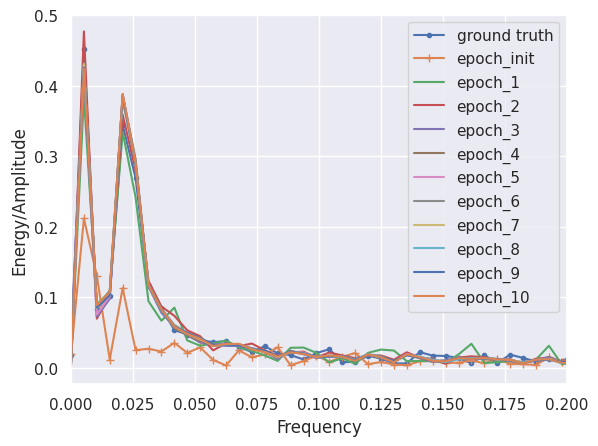

In [22]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,0]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,0]
freq5,energy5 = fft(ts5)

ts6 = pred_6[idx,:,0]
freq6,energy6 = fft(ts6)

ts7 = pred_7[idx,:,0]
freq7,energy7 = fft(ts7)

ts8 = pred_8[idx,:,0]
freq8,energy8 = fft(ts8)

ts9 = pred_9[idx,:,0]
freq9,energy9 = fft(ts9)

ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)
plt.plot(freq6,energy6)
plt.plot(freq7,energy7)
plt.plot(freq8,energy8)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/eq/Informer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

### spectrum visualization: init, first, last

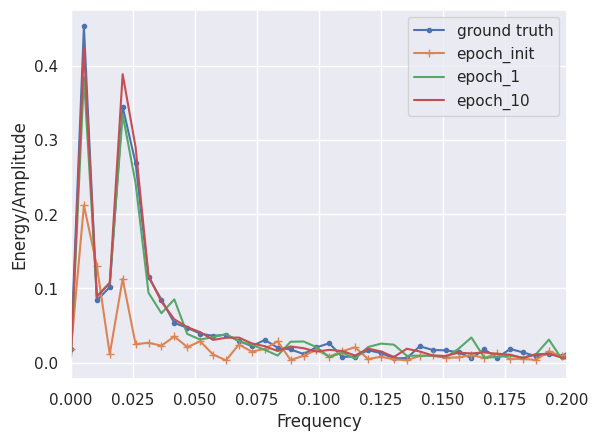

In [23]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/eq/Informer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [24]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))
e7 = np.zeros((192,))
e8 = np.zeros((192,))
e9 = np.zeros((192,))


for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,0]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,0]
  freq5,energy5 = fft(ts5)

  ts6 = pred_6[idx,:,0]
  freq6,energy6 = fft(ts6)

  ts7 = pred_7[idx,:,0]
  freq7,energy7 = fft(ts7)

  ts8 = pred_8[idx,:,0]
  freq8,energy8 = fft(ts8)

  ts9 = pred_9[idx,:,0]
  freq9,energy9 = fft(ts9)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5
  e6 += energy6
  e7 += energy7
  e8 += energy8
  e9 += energy9

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496
energy6 = e6 / 2496
energy7 = e7 / 2496
energy8 = e8 / 2496
energy9 = e9 / 2496

In [25]:
inf_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8, 'pred9_energy':energy9}

df_inf =  pd.DataFrame(inf_dict)
df_inf

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
0,0.000000,0.065664,0.164223,0.074228,0.069486,0.070934,0.066567,0.067811,0.067221,0.067488,0.067721,0.067772,0.067495
1,0.005208,0.479458,0.190009,0.481677,0.476635,0.486547,0.487423,0.491438,0.490771,0.490495,0.490690,0.491372,0.490838
2,0.010417,0.081815,0.152138,0.081493,0.083622,0.081945,0.084216,0.081118,0.084056,0.083523,0.083133,0.083838,0.083551
3,0.015625,0.108895,0.070748,0.112484,0.111162,0.114688,0.113751,0.113613,0.113562,0.113617,0.113458,0.113558,0.113909
4,0.020833,0.363325,0.104234,0.366187,0.380286,0.377312,0.379140,0.380012,0.378727,0.379564,0.378797,0.378955,0.379354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.973958,0.012816,0.003620,0.003928,0.002443,0.002307,0.002281,0.002213,0.002211,0.002235,0.002186,0.002235,0.002263
188,0.979167,0.010976,0.004835,0.002791,0.001985,0.001829,0.001760,0.001763,0.001812,0.001768,0.001818,0.001693,0.001767
189,0.984375,0.007487,0.004393,0.002620,0.002036,0.001709,0.001783,0.001729,0.001773,0.001740,0.001701,0.001735,0.001677
190,0.989583,0.010105,0.004425,0.002742,0.002055,0.001905,0.001861,0.001859,0.001816,0.001824,0.001823,0.001823,0.001833


In [26]:
x = df_inf.iloc[1:2, :]
y = df_inf.iloc[4:5, :]
sub_df_inf = pd.concat([x, y])
sub_df_inf

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
1,0.005208,0.479458,0.190009,0.481677,0.476635,0.486547,0.487423,0.491438,0.490771,0.490495,0.490690,0.491372,0.490838
4,0.020833,0.363325,0.104234,0.366187,0.380286,0.377312,0.379140,0.380012,0.378727,0.379564,0.378797,0.378955,0.379354


In [27]:
def inf_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(10)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [28]:
inf_ratios = inf_ratio(sub_df_inf)
inf_ratios = inf_ratios.drop('frequency', axis=1)
inf_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio,epoch_6_ratio,epoch_7_ratio,epoch_8_ratio,epoch_9_ratio
1,0.396300,1.004629,0.994113,1.014784,1.016612,1.024987,1.023595,1.023020,1.023427,1.024849,1.023735
4,0.286888,1.007876,1.046682,1.038497,1.043527,1.045929,1.042392,1.044693,1.042584,1.043019,1.044117


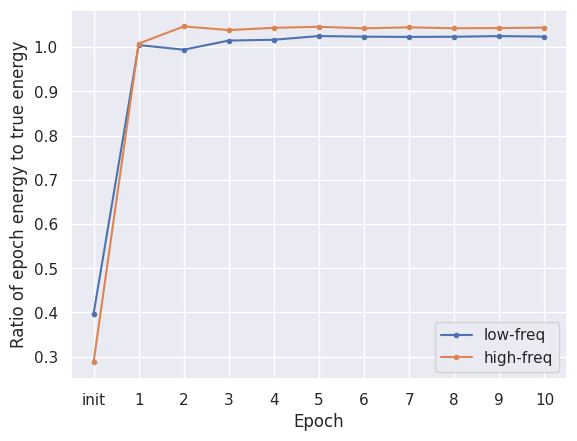

In [29]:
low = inf_ratios.iloc[0, :]
high = inf_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(inf_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/eq/Informer/spectral_graphs/spectrum_ratio.png')
plt.show()